In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from lmfit import Model
import astropy.units as u
from astropy import constants as const
from math import floor, log10


In [201]:
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\times 10^{{{1:d}}}$".format(coeff, exponent, precision)


In [202]:
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)

In [203]:
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

# Caso 1

In [204]:
B0 = 20*u.gauss

In [205]:
I = np.arange(0,5.5,0.5)
m0 = 892*u.mg.to(u.kg)
mall = (np.array([892,912,933,953,973,994,1014,1035,1055,1075,1096])/1e6)-m0
Fg = mall*const.g0

In [206]:
Fg.value,mall

(array([0.        , 0.00019613, 0.00040207, 0.00059821, 0.00079434,
        0.00100028, 0.00119641, 0.00140235, 0.00159848, 0.00179462,
        0.00200056]),
 array([0.00e+00, 2.00e-05, 4.10e-05, 6.10e-05, 8.10e-05, 1.02e-04,
        1.22e-04, 1.43e-04, 1.63e-04, 1.83e-04, 2.04e-04]))

In [216]:
np.array([892,912,933,953,973,994,1014,1035,1055,1075,1096])-892

array([  0,  20,  41,  61,  81, 102, 122, 143, 163, 183, 204])

In [218]:
B0.to(u.Tesla)

<Quantity 0.002 T>

In [214]:
for item in Fg[1:]:
    print("%s"%(sci_notation(item.value,4,3)))

$1.961\times 10^{-4}$
$4.021\times 10^{-4}$
$5.982\times 10^{-4}$
$7.943\times 10^{-4}$
$1.000\times 10^{-3}$
$1.196\times 10^{-3}$
$1.402\times 10^{-3}$
$1.599\times 10^{-3}$
$1.795\times 10^{-3}$
$2.001\times 10^{-3}$


In [193]:
def get_fb(I,s,L=0.2):
    return I*s

gmodelqm = Model(get_fb)


Medicion 
Constantes de Ajuste:  {'s': 0.0003995509400005035, 'L': 0.2}
R square:  0.9999809999648742


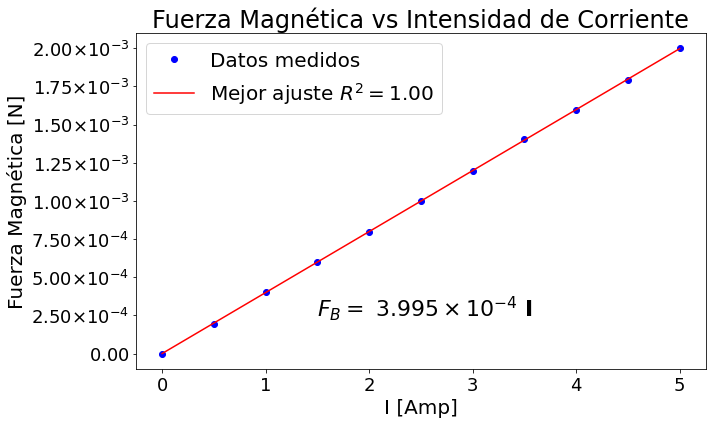

In [196]:
fig, ax = plt.subplots(ncols=1,figsize=(10,6))
resultqm = gmodelqm.fit(Fg.value,I=I,s=1)
delyqm = resultqm.eval_uncertainty(sigma=3)
Rsquaredqm = 1-resultqm.residual.var()/np.var(Fg.value)
print("")
print("Medicion ")
fitl = float(resultqm.values['s'])
# fiti = float(resultqm.values['b'])
print("Constantes de Ajuste: ", resultqm.values)
print("R square: ",Rsquaredqm)

ax.plot(I, Fg.value, 'bo',label='Datos medidos')
# ax.plot(allEnew, resultqm.init_fit, 'k--', label='Ajuste inicial')
ax.plot(I, resultqm.best_fit, 'r-', label=r'Mejor ajuste $R^2 = %.2f$'%(Rsquaredqm))
# ax.fill_between(allEnew, resultqm.best_fit-delyqm, resultqm.best_fit+delyqm, color="#ABABAB",
#                  label='Incertidumbre de 3-$\sigma$')
ax.legend(loc='best',fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel(r'Fuerza Magnética [N]',fontsize=20)
ax.set_xlabel(r'I [Amp]',fontsize=20)
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))
# gformat = "${}$".format(f._formatSciNotation('%1.10e' % fitl))

ax.text(1.5,2.5e-4,r'$F_B =$ %s I'%(sci_notation(fitl,4,3)),fontsize=22,weight='bold')
ax.set_title(r'Fuerza Magnética vs Intensidad de Corriente',fontsize = 24)

plt.tight_layout()

plt.savefig('./lab11/FvsI.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

# CASO 2

In [219]:
I0 = 2
B = np.arange(-40,4,4)[::-1]*u.gauss.to(u.Tesla)
m0 = 892*u.mg.to(u.kg)
mall = (np.array([892,908,924,941,957,973,990,1006,1022,1038,1055])/1e6)-m0
Fg = mall*const.g0

In [220]:
for item in Fg[1:]:
    print("%s"%(sci_notation(item.value,4,3)))

$1.569\times 10^{-4}$
$3.138\times 10^{-4}$
$4.805\times 10^{-4}$
$6.374\times 10^{-4}$
$7.943\times 10^{-4}$
$9.611\times 10^{-4}$
$1.118\times 10^{-3}$
$1.275\times 10^{-3}$
$1.432\times 10^{-3}$
$1.599\times 10^{-3}$


In [223]:
for item in B[1:]:
    print("%s"%(sci_notation(item,4,3)))

$-4.000\times 10^{-4}$
$-8.000\times 10^{-4}$
$-1.200\times 10^{-3}$
$-1.600\times 10^{-3}$
$-2.000\times 10^{-3}$
$-2.400\times 10^{-3}$
$-2.800\times 10^{-3}$
$-3.200\times 10^{-3}$
$-3.600\times 10^{-3}$
$-4.000\times 10^{-3}$


In [225]:
np.array([892,908,924,941,957,973,990,1006,1022,1038,1055]) - 892

array([  0,  16,  32,  49,  65,  81,  98, 114, 130, 146, 163])

In [176]:
def get_fb_B(B,s,L=0.2):
    return B*s

gmodelqmB = Model(get_fb_B)

In [177]:
Babs = np.abs(B)
Babs

array([0.    , 0.0004, 0.0008, 0.0012, 0.0016, 0.002 , 0.0024, 0.0028,
       0.0032, 0.0036, 0.004 ])


Medicion 
Constantes de Ajuste:  {'s': 0.3987613136379027, 'L': 0.2}
R square:  0.9999675641269535


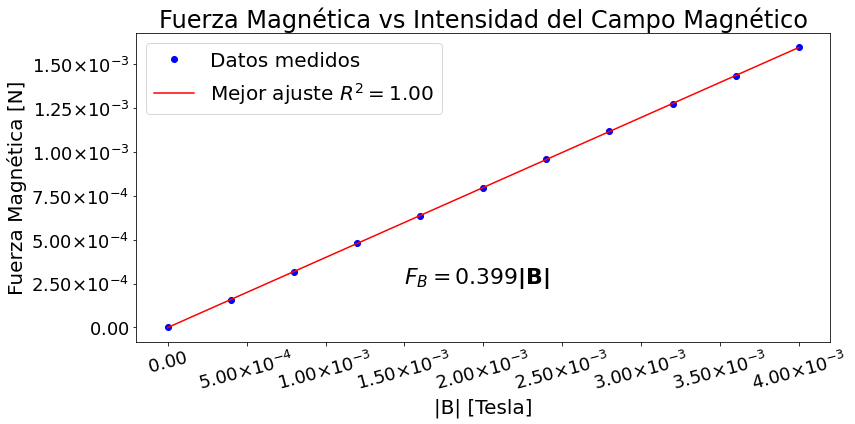

In [190]:
fig, ax = plt.subplots(ncols=1,figsize=(12,6))
resultqmB = gmodelqmB.fit(Fg.value,B=Babs,s=1)
delyqm = resultqmB.eval_uncertainty(sigma=3)
Rsquaredqm = 1-resultqmB.residual.var()/np.var(Fg.value)
print("")
print("Medicion ")
fitl = float(resultqmB.values['s'])
# fiti = float(resultqm.values['b'])
print("Constantes de Ajuste: ", resultqmB.values)
print("R square: ",Rsquaredqm)

ax.plot(Babs, Fg.value, 'bo',label='Datos medidos')
# ax.plot(allEnew, resultqm.init_fit, 'k--', label='Ajuste inicial')
ax.plot(Babs, resultqmB.best_fit, 'r-', label=r'Mejor ajuste $R^2 = %.2f$'%(Rsquaredqm))
# ax.fill_between(allEnew, resultqm.best_fit-delyqm, resultqm.best_fit+delyqm, color="#ABABAB",
#                  label='Incertidumbre de 3-$\sigma$')
ax.legend(loc='best',fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=18)

ax.tick_params(axis='x',labelrotation=15)

ax.set_ylabel(r'Fuerza Magnética [N]',fontsize=20)
ax.set_xlabel(r'|B| [Tesla]',fontsize=20)
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))

# gformat = "${}$".format(f._formatSciNotation('%1.10e' % fitl))

ax.text(1.5e-3,2.5e-4,r'$F_B = %.3f$|B|'%(fitl),fontsize=22,weight='bold')
ax.set_title(r'Fuerza Magnética vs Intensidad del Campo Magnético',fontsize = 24)

plt.tight_layout()

plt.savefig('./lab11/FvsB.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

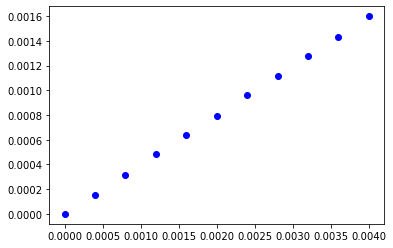

In [173]:
plt.plot(Babs, Fg.value, 'bo',label='Datos medidos')


In [159]:
fitl/.2

1.9938065681895134

In [160]:
.4/.2

2.0

In [170]:
fitl

0.17053382228532854